In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Base inicial

Foi descoberto um site, https://foxden.michaeljfox.org/insight/explore/fox.jsp , criado login e senha, e começamos uma análise inicial para descobrir a base encontrada.

A fim de saber tamanho, informações e formas de se tratar

In [3]:
df = pd.read_csv("FoxInsight.csv")
df

,fox_insight_id,age,days_elapsed,days_acquired,schedule_of_activities,Mobility,Care,Active,Pain,Anxious,Health,HealthPNA
0,FOX_000014,56.7,20632,0,REG,0,0.0,0.0,1.0,1.0,65.0,0.0
1,FOX_000076,82.1,29889,0,REG,1,0.0,1.0,1.0,1.0,83.0,0.0
2,FOX_000087,63.3,23061,0,REG,2,1.0,1.0,2.0,0.0,30.0,0.0
3,FOX_000087,63.7,23212,0,3,2,1.0,2.0,2.0,1.0,70.0,0.0
4,FOX_000087,66.6,24271,0,38,1,1.0,1.0,2.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
133268,FOX_999971,70.3,25607,0,33,0,0.0,1.0,1.0,0.0,8.0,0.0
133269,FOX_999971,70.9,25817,0,40,0,0.0,0.0,1.0,0.0,85.0,0.0
133270,FOX_999971,71.3,25973,0,46,0,0.0,0.0,0.0,0.0,80.0,0.0
133271,FOX_999971,71.9,26169,0,52,0,1.0,0.0,0.0,1.0,85.0,0.0


In [64]:
df['fox_insight_id'].duplicated().sum(
)

89602

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133273 entries, 0 to 133272
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   fox_insight_id          133273 non-null  object 
 1   age                     133273 non-null  float64
 2   days_elapsed            133273 non-null  int64  
 3   days_acquired           133273 non-null  int64  
 4   schedule_of_activities  129762 non-null  object 
 5   Mobility                133273 non-null  int64  
 6   Care                    133242 non-null  float64
 7   Active                  133188 non-null  float64
 8   Pain                    133151 non-null  float64
 9   Anxious                 133119 non-null  float64
 10  Health                  129830 non-null  float64
 11  HealthPNA               131235 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 12.2+ MB


In [14]:
df.describe()

,age,days_elapsed,days_acquired,Mobility,Care,Active,Pain,Anxious,Health,HealthPNA
count,133273.000000,133273.000000,133273.000000,133273.000000,133242.000000,133188.000000,133151.000000,133119.000000,129830.000000,131235.000000
mean,65.518055,23855.218934,0.036984,0.822912,0.416160,0.770970,1.033699,0.662888,71.316083,0.010706
std,10.759474,3928.515636,1.102458,0.921801,0.711632,0.904445,0.873973,0.829777,20.691419,0.102915
min,18.000000,6493.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.900000,21804.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000
50%,67.000000,24414.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,75.000000,0.000000
75%,72.700000,26491.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,85.000000,0.000000
max,119.800000,43299.000000,90.000000,5.000000,5.000000,5.000000,5.000000,5.000000,100.000000,1.000000


In [15]:
df.isnull().sum()

fox_insight_id               0
age                          0
days_elapsed                 0
days_acquired                0
schedule_of_activities    3511
Mobility                     0
Care                        31
Active                      85
Pain                       122
Anxious                    154
Health                    3443
HealthPNA                 2038
dtype: int64

In [17]:
mask = df.isnull()
df[mask]

,fox_insight_id,age,days_elapsed,days_acquired,schedule_of_activities,Mobility,Care,Active,Pain,Anxious,Health,HealthPNA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
133268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.columns

Index(['fox_insight_id', 'age', 'days_elapsed', 'days_acquired',
       'schedule_of_activities', 'Mobility', 'Care', 'Active', 'Pain',
       'Anxious', 'Health', 'HealthPNA'],
      dtype='object')

In [28]:
df.dropna(subset = ['Mobility', 'Care', 'Active', 'Pain',
                    'Anxious', 'Health'], inplace = True)#.isnull().sum()

In [29]:
df.isnull().sum()

fox_insight_id               0
age                          0
days_elapsed                 0
days_acquired                0
schedule_of_activities    3429
Mobility                     0
Care                         0
Active                       0
Pain                         0
Anxious                      0
Health                       0
HealthPNA                    0
dtype: int64

In [31]:
df['schedule_of_activities'].unique()

array(['REG', '3', '7', '10', '16', '9', '31', '43', '6', '18', nan, '13',
       '24', '27', '34', '40', '46', '51', '58', '22', '45', '28', '12',
       '15', '21', '33', '39', '52', '64', '25', '11', '8', '14', '20',
       '26', '32', '38', '44', '4', '30', '36', '42', '48', '60', '37',
       '55', '56', '62', '70', '57', '2', '61', '67', '49', '63', '53',
       '5', '19', '50', '59', '69', '65', '68', '17', '71', '29', '23',
       '1', '73', '41', '47', '54', '74', '66', '35', '72'], dtype=object)

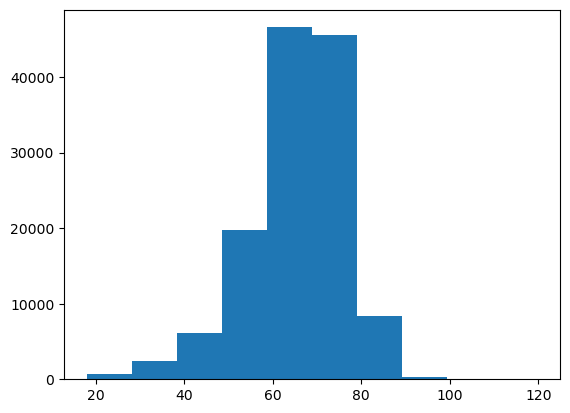

In [34]:
plt.hist(df['age']) # Cria um histograma da coluna 'idade'
plt.show()

In [35]:
df.columns

Index(['fox_insight_id', 'age', 'days_elapsed', 'days_acquired',
       'schedule_of_activities', 'Mobility', 'Care', 'Active', 'Pain',
       'Anxious', 'Health', 'HealthPNA'],
      dtype='object')

In [61]:
df.columns

Index(['fox_insight_id', 'age', 'days_elapsed', 'days_acquired',
       'schedule_of_activities', 'Mobility', 'Care', 'Active', 'Pain',
       'Anxious', 'Health', 'HealthPNA'],
      dtype='object')

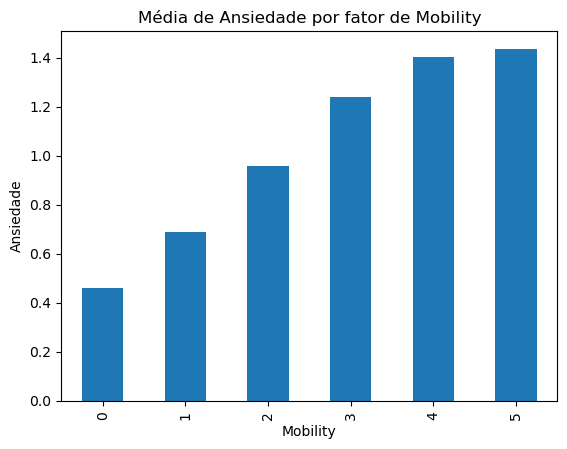

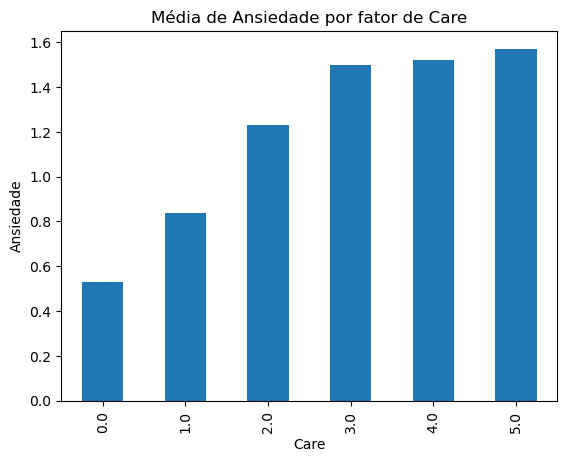

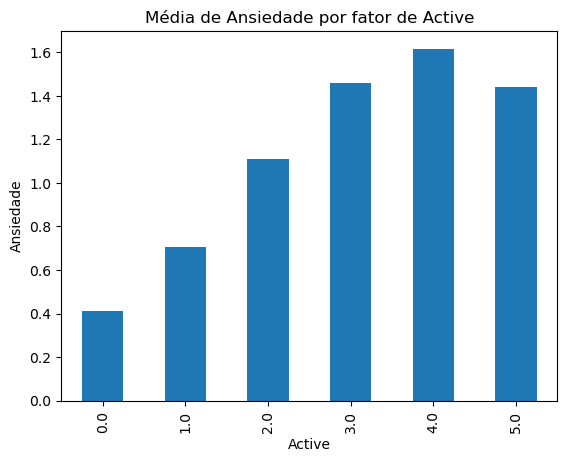

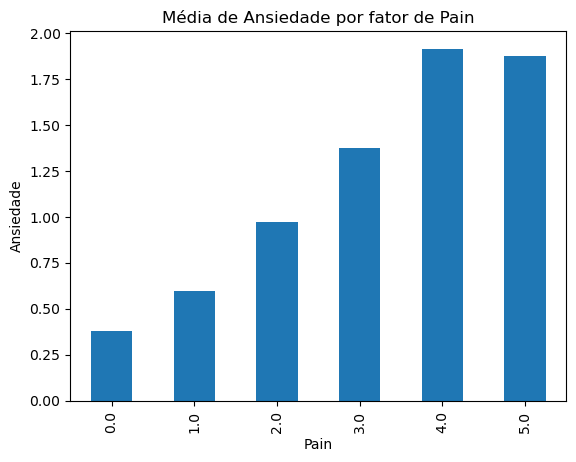

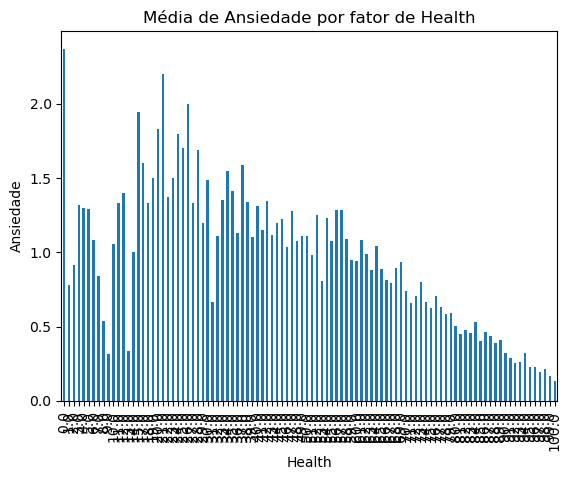

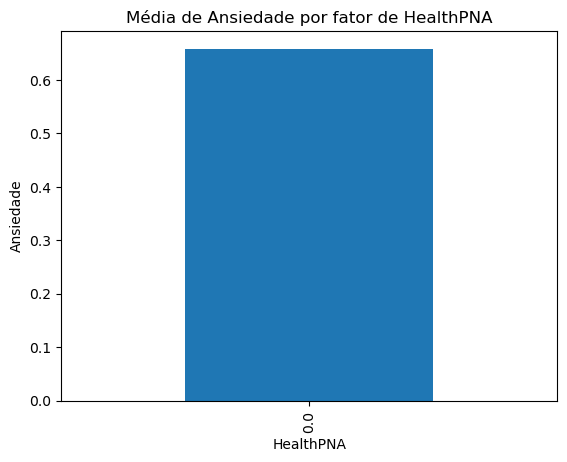

In [63]:
col = ['Mobility', 'Care', 'Active', 'Pain',
        'Health', 'HealthPNA']
for i in col:

    df.groupby(i)['Anxious'].mean().plot(kind='bar')
    plt.xlabel(f'{i}')
    plt.ylabel('Ansiedade')
    plt.title(f'Média de Ansiedade por fator de {i}')
    plt.show()

In [22]:
df.duplicated().sum()

0

In [47]:
df['age'].min() ## 119  18

18.0

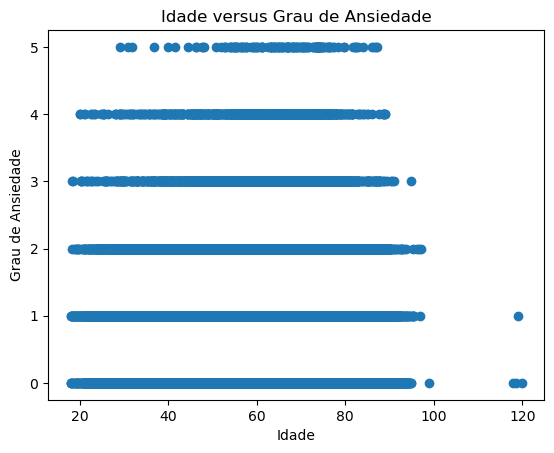

In [52]:
plt.scatter(df['age'], df['Anxious'])
# Define o título do gráfico e dos eixos
plt.title('Idade versus Grau de Ansiedade')
plt.xlabel('Idade')
plt.ylabel('Grau de Ansiedade')

plt.show()